In [1]:
import os
import uproot
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

#os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import keras.backend as K

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from keras.models import Model
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Flatten
from keras import regularizers
from keras.layers.merge import concatenate
import keras.losses

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from scipy.stats import ks_2samp

os.chdir('../src/')
import ml_analysis_plotting

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

The cell below accesses and orients the input arrays correctly

In [2]:
def  get_input_arrays(tree, features_list, printout = False):
    
    """function to accesses and orient the input arrays correctly"""
    
    array = np.transpose(tree.arrays(features_list, outputtype=tuple))
    if printout:
        print(array.shape)
        print(array[0])
        print("check for nans:")
        print(np.where(np.isnan(array) == True))
    return array

In [3]:
## Get the data
os.chdir('../data')
f = uproot.open("KINNW_MC16e_nomSignal_mlpreped_temp/out_proc_0_copy.root")
tree = f["features"]
save_name = "INTNOTE_01"

In [4]:
tree.keys()

[b'top_pt',
 b'top_eta',
 b'top_phi',
 b'tbar_pt',
 b'tbar_eta',
 b'tbar_phi',
 b'lep_t_pt',
 b'lep_t_eta',
 b'lep_t_phi',
 b'lep_tbar_pt',
 b'lep_tbar_eta',
 b'lep_tbar_phi',
 b'nu_top_pt',
 b'nu_top_eta',
 b'nu_top_phi',
 b'nu_tbar_pt',
 b'nu_tbar_eta',
 b'nu_tbar_phi',
 b'b_pt',
 b'b_eta',
 b'b_phi',
 b'bbar_pt',
 b'bbar_eta',
 b'bbar_phi',
 b'ttbar_pt',
 b'ttbar_eta',
 b'ttbar_phi',
 b'top_m',
 b'tbar_m',
 b'lep_top_m',
 b'lep_tbar_m',
 b'nu_top_m',
 b'nu_tbar_m',
 b'b1_m',
 b'b2_m',
 b'ttbar_m',
 b'met',
 b'met_x',
 b'met_y',
 b'c_nn',
 b'c_rr',
 b'c_kk',
 b'c_rk',
 b'c_kr',
 b'c_nr',
 b'c_rn',
 b'c_nk',
 b'c_kn',
 b'c_nk_p_kn',
 b'c_nr_p_rn',
 b'c_rk_p_kr',
 b'c_nk_m_kn',
 b'c_nr_m_rn',
 b'c_rk_m_kr',
 b'b_kplus',
 b'b_nplus',
 b'b_rplus',
 b'b_kminus',
 b'b_nminus',
 b'b_rminus',
 b'lep_delta_phi',
 b'lep_delta_eta',
 b'top_delta_phi',
 b'top_delta_eta',
 b'lep_dphi_bypt',
 b'costheta_leps_a_k',
 b'costheta_leps_a_n',
 b'costheta_leps_a_r',
 b'costheta_leps_b_k',
 b'costheta_lep

In [5]:
## Define and save the features
features_list = [
 b'lep_t_pt',
 b'lep_t_eta',
 b'lep_t_phi',
 b'lep_tbar_pt',
 b'lep_tbar_eta',
 b'lep_tbar_phi',
 b'b_pt',
 b'b_eta',
 b'b_phi',
 b'bbar_pt',
 b'bbar_eta',
 b'bbar_phi',
 b'met_x',
 b'met_y',
 b'lep_delta_phi',
 b'lep_delta_eta',
]

"""
features_list = [
 b'top_pt',
 b'top_eta',
 b'top_phi',
 b'tbar_pt',
 b'tbar_eta',
 b'tbar_phi',
 b'lep_t_pt',
 b'lep_t_eta',
 b'lep_t_phi',
 b'lep_tbar_pt',
 b'lep_tbar_eta',
 b'lep_tbar_phi',
 b'nu_top_pt',
 b'nu_top_eta',
 b'nu_top_phi',
 b'nu_tbar_pt',
 b'nu_tbar_eta',
 b'nu_tbar_phi',
 b'b_pt',
 b'b_eta',
 b'b_phi',
 b'bbar_pt',
 b'bbar_eta',
 b'bbar_phi',
 b'ttbar_pt',
 b'ttbar_eta',
 b'ttbar_phi',
 b'top_m',
 b'tbar_m',
 b'lep_top_m',
 b'lep_tbar_m',
 b'nu_top_m',
 b'nu_tbar_m',
 b'b1_m',
 b'b2_m',
 b'ttbar_m',
 b'met',
 b'met_x',
 b'met_y',
 b'c_nn',
 b'c_rr',
 b'c_kk',
 b'c_rk',
 b'c_kr',
 b'c_nr',
 b'c_rn',
 b'c_nk',
 b'c_kn',
 b'c_nk_p_kn',
 b'c_nr_p_rn',
 b'c_rk_p_kr',
 b'c_nk_m_kn',
 b'c_nr_m_rn',
 b'c_rk_m_kr',
 b'b_kplus',
 b'b_nplus',
 b'b_rplus',
 b'b_kminus',
 b'b_nminus',
 b'b_rminus',
 b'lep_delta_phi',
 b'lep_delta_eta',
 b'top_delta_phi',
 b'top_delta_eta',
 b'lep_dphi_bypt',
 b'costheta_leps_a_k',
 b'costheta_leps_a_n',
 b'costheta_leps_a_r',
 b'costheta_leps_b_k',
 b'costheta_leps_b_n',
 b'costheta_leps_b_r',
 b'dp_u_ll',
 b'dp_u_bb',
 b'dp_u_blep',
 b'dp_u_bbarlep',
 b'dp_u_blbar',
 b'dp_u_bbarlbar',
 b'dp_ll',
 b'dp_bb',
 b'dp_blep',
 b'dp_bbarlep',
 b'dp_blbar',
 b'dp_bbarlbar',
    # standard 'ATLAS' reco stuff
    b'reco_met',
    b'reco_met_phi',
    b'reco_lep_p_pt',
    b'reco_lep_p_eta',
    b'reco_lep_p_phi',
    b'reco_lep_p_e',
    b'reco_lep_n_pt',
    b'reco_lep_n_eta',
    b'reco_lep_n_phi',
    b'reco_lep_n_e',
    b'reco_jet_0_pt',
    b'reco_jet_0_eta',
    b'reco_jet_0_phi',
    b'reco_jet_0_e',
    b'reco_jet_1_pt',
    b'reco_jet_1_eta',
    b'reco_jet_1_phi',
    b'reco_jet_1_e',
    b'reco_jet_2_pt',
    b'reco_jet_2_eta',
    b'reco_jet_2_phi',
    b'reco_jet_2_e',
    b'reco_lep_delta_phi',
    b'reco_lep_delta_eta',
    b'reco_jet_delta_phi',
    b'reco_jet_delta_eta',
    b'reco_jetlep_delta_phi_0',
    b'reco_jetlep_delta_phi_1',
    b'costheta_reco_leps_a_k',
    b'costheta_reco_leps_a_r',
    b'costheta_reco_leps_a_n',
    b'costheta_reco_leps_b_k',
    b'costheta_reco_leps_b_r',
    
    b'KIN_truth_topdeltaR',
    b'KIN_truth_tbardeltaR',
    b'NW_truth_topdeltaR',
    b'NW_truth_tbardeltaR',
    
    
    # Neutrino Weighter reco (NW) outputs
    b'NW_weight',
    b'NW_b_kplus',
    
    # KIN reco outputs
    b'KIN_prob',
]
"""
with open(save_name + "_feat.txt", "wb") as fp:
    pickle.dump(features_list, fp)

In [6]:
## Define the target
spin_target = tree.array(b'b_kplus') #<- b_kplus' is the truth value
#spin_target = tree.array(b'KIN_b_kplus')
#h,b,_=plt.hist(spin_target, bins=10) # <- NB this makes 1 sample fall on a bin edge which causes propblems with digitization
#h,b,_=plt.hist(spin_target, bins=10, range=[-1.0, 1.0])
h,b,_=plt.hist(spin_target, bins=10)
#print("bin values: "h)
print("bin edges:  ", b)


bin edges:   [-9.99570358e-01 -7.99615702e-01 -5.99661046e-01 -3.99706389e-01
 -1.99751733e-01  2.02923445e-04  2.00157580e-01  4.00112236e-01
  6.00066893e-01  8.00021549e-01  9.99976205e-01]


In [7]:
## Define weights for target (N_weights = N_bins)
#spin_weights = np.max(h)/h
spin_weights = 1/(h * 1/np.max(h))
print(spin_weights)

## Get bin index for every target
target_windex = np.digitize(spin_target, b)
print("target_windex:", target_windex)
## Associate a target with a weight
target_weight = np.zeros(len(spin_target))
for i in range(len(spin_weights)):
    #print(np.where(target_index == i+1)[0])
    target_weight[np.where(target_windex == i+1)[0]] = spin_weights[i]
print("target_weight:", target_weight)

# Check...
print("checking...")
onearray = np.zeros(len(spin_target))
#print("target weight: ", target_weight)
#print("THIS:", np.where(target_index == 10)[0])
print("length one array:", len(onearray))
for j in range(3):
    #print(j)
    onearray[j] = target_weight[j]/spin_weights[target_windex[j]-1]
    #print("target_windex:", target_windex[j])
    #print("onearray_j", onearray[j])


## FROM BLAKE #####
#weights = 1/(h * 1/np.max(h))
#print(weights)
#locs = np.digitize(target, b)
#weights_array = np.zeros(len(target))
#for i in range(len(weights)):
#    weights_array[np.where(locs == i+1)[0]] = weights[i]

[2.89141743 1.47032567 1.17273207 1.05944014 1.02112514 1.00747621
 1.         1.0152968  1.05329228 1.07688582]
target_windex: [ 7  6  3 ... 10  8  3]
target_weight: [1.         1.00747621 1.17273207 ... 1.07688582 1.0152968  1.17273207]
checking...
length one array: 76999


In [8]:
print("len weights_array:", len(target_weight))

for i in range(12):
    print(target_weight[i])

print("........")
target_weight = np.ones(len(target_weight))
print("len weights_array:", len(target_weight))
for i in range(12):
    print(target_weight[i])

len weights_array: 76999
1.0
1.00747621205256
1.1727320675105486
1.053292278540976
1.053292278540976
1.0152968036529681
1.00747621205256
1.0211251435132032
1.0768858215280301
1.0211251435132032
1.0594401429422275
1.053292278540976
........
len weights_array: 76999
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [9]:
plt.hist(spin_target,len(b)-1)
#plt.hist(spin_target,bins=25,weights=target_weight,alpha=.25)
#plt.hist(spin_target,bins=10)
plt.hist(spin_target,len(b)-1,weights=target_weight,alpha=.25)

(array([3076., 6049., 7584., 8395., 8710., 8828., 8894., 8760., 8444.,
        8259.]),
 array([-9.99570358e-01, -7.99615702e-01, -5.99661046e-01, -3.99706389e-01,
        -1.99751733e-01,  2.02923445e-04,  2.00157580e-01,  4.00112236e-01,
         6.00066893e-01,  8.00021549e-01,  9.99976205e-01]),
 <a list of 10 Patch objects>)

In [10]:
## (optional) Check inputs
check_inputs = False
if check_inputs:
    
    # check features
    for feature in features_list:
        print(feature)
        #plt.hist(tree1.array(feature),bins=40,density=True,alpha=.8)
        plt.hist(tree.array(feature),bins=25,density=True,alpha=.5)
        plt.show()
    
    # check target are in range [-1,1]
    print("check for spin target outside [-1,1]:")
    print(np.where(spin_target < -1)[0])
    print(np.where(spin_target >  1)[0])

(array([3076., 6049., 7584., 8395., 8710., 8828., 8894., 8760., 8444.,
        8259.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

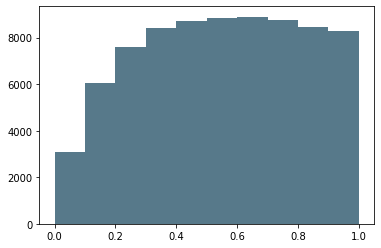

In [11]:
## Shift target values to [0,1]
spin_transformer = RobustScaler()
spin_target_scaled = spin_transformer.fit_transform(spin_target.reshape(-1,1))
spin_target_scaled = (spin_target_scaled - np.min(spin_target_scaled))/(np.max(spin_target_scaled) - np.min(spin_target_scaled))
#print(spin_target_scaled.shape)
plt.hist(spin_target_scaled,len(b)-1)
plt.hist(spin_target_scaled,len(b)-1,weights=target_weight,alpha=.25)
#spin_target = (spin_target + 1)/2

In [12]:
#print(spin_target[:10])
#print(weights_array[:10])

In [13]:
features_array = get_input_arrays(tree, features_list, True) # <- add 'True' to check shape, first entry and nans 

(76999, 16)
[ 4.45890117e+04 -2.24169469e+00 -2.21279383e+00  6.73128750e+04
 -2.59063751e-01 -1.16379464e+00  2.54946191e+04 -1.89909184e+00
  9.15064037e-01  5.88655039e+04 -3.62478226e-01 -2.25299120e+00
 -2.36792996e+04  5.57318397e+04  1.04899919e+00  1.98263094e+00]
check for nans:
(array([], dtype=int64), array([], dtype=int64))


In [14]:
## Scale features to improve performance
transformer = RobustScaler()
features_array_scaled = transformer.fit_transform(features_array)
#print(features_array_scaled.shape)

In [15]:
model = Sequential()
modname = '_arch200-100-50-25'
model.add(Dense(200, input_dim=len(features_list), activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(400, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(150, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
#model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
## Define custon loss functions

def custom_loss(y_true, y_pred):
    #return ((K.abs(y_pred) * 1.0) * keras.losses.logcosh(y_pred, y_true))
    return keras.losses.logcosh(y_pred, y_true)
def custom_loss_2(y_true, y_pred):    
    return (y_true - y_pred)

In [17]:
lossname = '_lossmse'
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])
#model.compile(loss=custom_loss, optimizer='adam', metrics=['mae', 'mse',custom_loss])

In [18]:
#features_array_scaled, spin_target_scaled, weights_array = shuffle(features_array_scaled, spin_target_scaled, weights_array)
features_array_scaled, spin_target_scaled = shuffle(features_array_scaled, spin_target_scaled)

In [ ]:


#X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(features_array_scaled, spin_target_scaled, target_weight, test_size=0.2)
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(features_array_scaled, spin_target_scaled, target_weight, test_size=0.2)
#X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(features_array, spin_target, target_weight, test_size=0.2)

#history = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_split=.2, sample_weight=w_train)
history = model.fit(X_train, y_train, epochs=150, batch_size=21, verbose=1, validation_split=.2, sample_weight=w_train)
#history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1, validation_split=.2, callbacks=[es])
#history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=.2)


Train on 49279 samples, validate on 12320 samples
Epoch 1/150
49279/49279 [==============================] - 4s 80us/step - loss: 0.0339 - mae: 0.1478 - mse: 0.0339 - val_loss: 0.0301 - val_mae: 0.1391 - val_mse: 0.0301
Epoch 2/150
49279/49279 [==============================] - 4s 83us/step - loss: 0.0260 - mae: 0.1274 - mse: 0.0260 - val_loss: 0.0231 - val_mae: 0.1177 - val_mse: 0.0231
Epoch 3/150
49279/49279 [==============================] - 4s 82us/step - loss: 0.0208 - mae: 0.1123 - mse: 0.0208 - val_loss: 0.0198 - val_mae: 0.1087 - val_mse: 0.0198
Epoch 4/150
49279/49279 [==============================] - 4s 74us/step - loss: 0.0189 - mae: 0.1063 - mse: 0.0189 - val_loss: 0.0192 - val_mae: 0.1070 - val_mse: 0.0192
Epoch 5/150
49279/49279 [==============================] - 4s 82us/step - loss: 0.0178 - mae: 0.1028 - mse: 0.0178 - val_loss: 0.0187 - val_mae: 0.1054 - val_mse: 0.0187
Epoch 6/150
49279/49279 [==============================] - 4s 74us/step - loss: 0.0169 - mae: 0.100

In [ ]:
#model.save_weights('model_weights.h5')
model.save(save_name + modname + lossname + '_model.h5')

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
'''
for i in range(1):
    plt.scatter(range(len(histories[i])), histories[i])
'''
#history_hist = plt.hist(history.history['loss'], bins=50)
#plt.plot(range(len(history.history['loss'])), history.history['loss'], label='training w. deltas')
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='training')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='validation')
#plt.xlim(0.01, 70.0)
#plt.ylim(0.0, 0.00000000001)
#plt.plot(range(len(history.history['val_mae'])), history.history['val_mae'], label='validation2')
plt.legend(fontsize=30)
plt.xlabel('Epochs', fontsize=20)
#plt.ylabel('Mean absolute error', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('Loss Vs Epoch', fontsize=25)
plt.savefig(save_name + modname + lossname + '_loss')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
print(model.evaluate(X_test, y_test))

In [ ]:
#plt.hist(y_pred)
#plt.hist(y_test)

In [ ]:
#spin_transformer = RobustScaler()
#spin_target_scaled = spin_transformer.fit_transform(spin_target.reshape(-1,1))
#spin_target_scaled = (spin_target_scaled - np.min(spin_target_scaled))/(np.max(spin_target_scaled) - np.min(spin_target_scaled))
#print(spin_target_scaled.shape)

#transformer = RobustScaler()
#features_array_scaled = transformer.fit_transform(features_array)
#print(features_array_scaled.shape)

In [ ]:
y_pred_unscaled = y_pred*2 - 1
y_test_unscaled = y_test*2 - 1
#y_pred_unscaled = y_pred - 1
#y_test_unscaled = y_test - 1

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
a = y_pred_unscaled
print(a)
b = y_test_unscaled
print(b)
bins=np.histogram(np.hstack((a,b)), bins=10)[1]
h1,b1,_=plt.hist(a, bins, histtype='step', linewidth=2.5, label='Prediction', color='sandybrown')
h2,b2,_=plt.hist(b, bins, histtype='step', linewidth=2.5, label='truth level', color='steelblue')
KLdiv = 0.0
KLfault = False
KLfault_n = 0
for i in range(len(h1)):
    #print("bin", i, h2[i]/tot_h)
    truth_prob = h2[i]/np.sum(h2)
    #print(val/len(a), ent)
    pred_prob = h1[i]/np.sum(h1)
    #pred_prob = 0.0
    if pred_prob == 0.0:
        KLfault = True
        KLfault_n += 1
        pred_prob = 0.000001
    if truth_prob == 0.0:
        truth_prob = 0.000001
    KLdiv += truth_prob*(np.log(truth_prob) - np.log(pred_prob))
        #print(KLdiv)
        #KLdiv += (np.log(truth_prob) - np.log(pred_prob))
plt.text(0.01, 0.75,'KL:', fontsize=24, verticalalignment='center', transform=ax.transAxes)
plt.text(0.1, 0.75,round(KLdiv,5), fontsize=24, verticalalignment='center', transform=ax.transAxes)
if KLfault:
    plt.text(0.01, 0.7,'No. of KL faults:',fontsize=24, verticalalignment='center', transform=ax.transAxes)
    plt.text(0.36, 0.7, KLfault_n, fontsize=24, verticalalignment='center', transform=ax.transAxes)
plt.legend(fontsize=30)
plt.ylim(0,4000)
plt.xlabel(r'cos$\theta_{k}^{+}$', fontsize=30)
plt.ylabel('Aribitrary Unit', fontsize=30)
plt.savefig(save_name + modname + lossname + '_pred')
plt.show()

In [ ]:
y_diff = y_test_unscaled - y_pred_unscaled
y_diff = y_diff[np.logical_not(np.isnan(y_diff))]
print(np.std((y_test_unscaled - y_pred_unscaled)))

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
#plt.bar(range(len(h1)),h1/len(a),alpha=.4, color='sandybrown', label='Prediction from truth w deltas')
plt.bar(range(len(h1)),h1/len(a),alpha=.4, color='sandybrown', label='Prediction')
plt.bar(range(len(h2)),h2/len(b),alpha=.5, color='steelblue', label='truth level')
plt.legend(fontsize=30)
plt.xlabel(r'(bins of) cos$\theta_{n}^{+}$cos$\theta_{n}^{-}$', fontsize=30)
plt.ylabel('Probability', fontsize=30)

#plt.annotate("Kullback-Leibler divergence:", (.3,.94))
#plt.annotate("Kullback-Leibler divergence:", (.3,.94), fontsize=24)
#fig = plt.figure()
#text='''testt'''
#fig.text(.1,.1,text)
plt.text(0.14, 0.75,'KL div. = ', ha='right', va='center', transform=ax.transAxes, fontsize=24)
plt.text(0.15, 0.75,round(KLdiv,5), ha='left', va='center', transform=ax.transAxes, fontsize=24)

#plt.text(0.2, 0.8,'epochs = ', ha='right', va='center', transform=ax.transAxes, fontsize=24)
#plt.text(0.211, 0.8,'600', ha='left', va='center', transform=ax.transAxes, fontsize=24)

plt.savefig(save_name + modname + '_prob')
plt.show()
#print(h1/len(a))

## KL divergence ##
#KLdiv = 0.0
#for i in range(len(h1)):
#    truth_prob = h[i]/tot_h
#    #print(val/len(a), ent)
#    pred_prob = h1[i]/len(a)
#    if pred_prob > 0.0 and truth_prob > 0.0:
#        KLdiv += truth_prob*(np.log(truth_prob) - np.log(pred_prob))
#print(KLdiv)



In [ ]:
class make_hist_dicts:

    def correct_compare_hist(self,
        array1, array2, nBins=40, normed=False, gauss=False, logY=False
    ):
        array1_dict = {"hist":None, "binx":None, "weights":None, "binDx":None}
        array2_dict = {"hist":None, "binx":None, "weights":None, "binDx":None}

        array1 = self.removeNan(array1)
        array2 = self.removeNan(array2)

        if gauss is True:
            ratio = guassian_comparison_ratio(array1, array2, nBins)
        else:
            ratio = np.ones(nBins)
        
        hist1, bins1, hist2, bins2 = self.get_hists(array2, array1, nBins)
        
        stat = np.round(ks_2samp(plt.hist(array1, bins=nBins)[0], plt.hist(array2, bins=nBins)[0]), 4)
        plt.close()
        b1 = np.zeros(len(hist1))
        w1 = np.zeros(len(hist1))
        for i in range(len(hist1)):
            b1[i] = (bins1[i + 1] + bins1[i]) / 2
            w1[i] = bins1[i + 1] - bins1[i]
        b2 = b1
        w2 = w1
        
        array1_dict["binDx"] = w1
        array2_dict["binDx"] = w2
        
        array1_dict["hist"] = hist1
        array2_dict["hist"] = hist2
        
        array1_dict["binx"] = b1
        array2_dict["binx"] = b2
        
        hist1 = np.multiply(hist1, ratio)
        hist2 = np.multiply(hist2, ratio)

        weights1 = self.get_weights(array1, bins1, ratio)
        weights2 = self.get_weights(array2, bins2, ratio)
        
        array1_dict["weights"] = weights1
        array2_dict["weights"] = weights2

        if normed is False:
            scale1 = np.maximum(np.max(hist1), np.max(hist2))
            scale2 = scale1
        else:
            scale1 = np.max(hist1)
            scale2 = np.max(hist2)
        
        #error = hist2/len(array2)
        error = 1./hist2    
        fig, ax = plt.subplots(figsize=(16, 10))
        plt.cla()
        if logY is True:
            ax.set_yscale("log")
        ax.set_title("Regression Analysis - model 3, Batches", fontsize=35)
        ax.set_xlabel("kk", fontsize=24)
        ax.set_ylabel("Arbitraty Units", fontsize=24)
        plt.bar(b1, hist1 / scale1, width=w1, alpha=0.2, color="blue", label="Truth")
        plt.bar(b2, hist2 / scale2, width=w2, yerr=error, alpha=0.2, color="red", label="Prediction")
        plt.bar(
            b1,
            hist1 / scale1,
            width=w1,
            alpha=1.0,
            color="none",
            edgecolor="blue",
            linewidth=2.0,
        )
        plt.bar(
            b2,
            hist2 / scale2,
            width=w2,
            alpha=1.0,
            color="none",
            edgecolor="red",
            linewidth=2.0,
        )
        plt.annotate("Kolmogorov–Smirnov", (.7,.94), fontsize=24)
        plt.annotate("Statistic: "+str(stat[0]), (.75,.87), fontsize=24)
        plt.annotate("P-value: "+str(stat[1]), (.75,.80), fontsize=24)
        plt.legend(fontsize=24)
        plt.ylim(0,1.2)
        plt.show()
        
        return array1_dict, array2_dict, ratio

    def removeNan(self,array):
        if len(np.where(np.isnan(array) is True)) == 0:
            pass
        return array[np.logical_not(np.isnan(array))]

    def get_hists(self, array1, array2, nBins):

        """
        array1 = (
            2 * (array1 - np.min(array1)) / (np.max(array1) - np.min(array1)) - 1
        )
        array2 = (
            2 * (array2 - np.min(array2)) / (np.max(array2) - np.min(array2)) - 1
        )
        """

        hist1, bins1, _ = plt.hist(
            array2, color="blue", alpha=0.2, bins=nBins
        )  # , weights=true_z_w)
        plt.close()
        bins2 = bins1
        hist2 = np.zeros(len(hist1))

        # z_reg = np.multiply(test_z_torch.data.numpy().reshape(1000), test_z_w)
        # z_reg = test_z_torch.data.numpy().reshape(len(true_z))
        # z_reg = test_z_torch

        for i in range(len(hist1)):
            hist2[i] = len(
                np.where(array1[np.where((array1 <= bins1[i + 1]))[0]] > bins1[i])[0]
            )  # & (z_reg > bins1[i])[0])]))
            if i == len(hist1):
                hist2[i] = len(np.where(array1 >= bins1[i])[0])
        return hist1, bins1, hist2, bins2

    def get_weights(self, array, bins, ratio):

        weights = np.zeros(len(array))
        bins = np.digitize(array, bins)

        for i in range(len(ratio)):
            weights[np.where(bins == i)] = ratio[i]

        return weights

In [ ]:
y_y = spin_transformer.fit_transform(y_test.reshape(-1,1))
y_y = (y_y - np.min(y_y))/(np.max(y_y) - np.min(y_y))
comp = make_hist_dicts()
hist1, hist2, ratio = comp.correct_compare_hist(y_y, y_pred, nBins=10)